In [1]:
%matplotlib inline

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pickle
import seaborn as sns
from matplotlib.lines import Line2D
from scipy.interpolate import PchipInterpolator

import csky as cy

mpl.style.use('../note_plot_style.mplstyle')

In [4]:
def power_law(gamma, norm, en, pivot):
    return np.power(en / pivot, -gamma)*norm

In [5]:
with open('./results/effective_area_central_energies.pkl', 'rb') as f:
    central_ens = pickle.load(f)
sinDecs = np.linspace(-0.9, 0.9, 51)
decs = np.arcsin(sinDecs)
dec = decs[25]

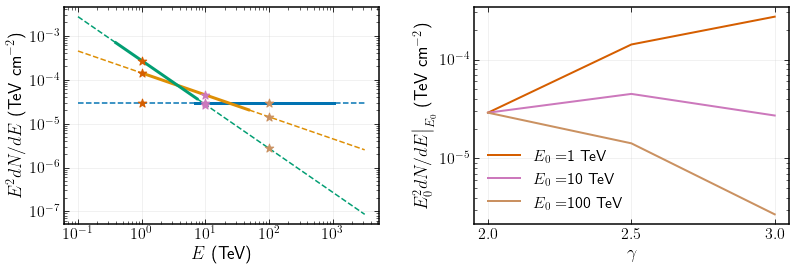

In [7]:
ens = np.logspace(-1., 3.5, 500)
palette = sns.color_palette('colorblind', 9)
lw = 3.

fig, aaxs = plt.subplots(ncols=2, figsize=(13, 4))
fig.subplots_adjust(wspace=0.3)
axs = aaxs.ravel()

for i, gam in enumerate([2.0, 2.5, 3.0]):
    with open(f'./results/central_energy_results_dec_0.0_gamma_{gam:.1f}.pkl', 'rb') as f:
        sens = pickle.load(f)
    norm = sens[1000.]['no_cut'] 
    pivot = 1.
    spec = power_law(gam, norm, ens, pivot)
    msk_low = ens < (central_ens[dec][gam]['low'] / 1e3)
    msk_high = ens > (central_ens[dec][gam]['high'] / 1e3)
    
    axs[0].plot(
        ens[~msk_low*~msk_high], 
        spec[~msk_low*~msk_high]*(ens[~msk_low*~msk_high]**2.), 
        lw=lw, 
        color=palette[i]
    )
    axs[0].plot(
        ens[msk_low], 
        spec[msk_low]*(ens[msk_low]**2.), 
        lw=lw/2., 
        ls='--',
        color=palette[i]
    )
    axs[0].plot(
        ens[msk_high], 
        spec[msk_high]*(ens[msk_high]**2.), 
        lw=lw/2., 
        ls='--',
        color=palette[i]
    )
    
    
axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].set_xlabel(r'$E$ (TeV)')
axs[0].set_ylabel(r'$E^2dN/dE$ (TeV cm$^{-2}$)')

# now do the pivot energy plot
ens = np.logspace(0, 2., 3)
gammas = [2.0, 2.5, 3.0]
norms = {}

for i, gam in enumerate(gammas):
    with open(f'./results/central_energy_results_dec_0.0_gamma_{gam:.1f}.pkl', 'rb') as f:
        sens = pickle.load(f)
    norm = sens[1000.]['no_cut'] 
    norms[gam] = norm
    
pivot = 1.
en_strs = ['1 TeV', '10 TeV', '100 TeV'] #['100 GeV', '1 TeV', '10 TeV', '100 TeV', '1 PeV']
for i, en in enumerate(ens):
    arr = [power_law(gam, norms[gam], en, pivot)*(en**2.) for gam in gammas]
    axs[1].plot(gammas, arr, label=r'$E_0 = $' + en_strs[i], lw=2., color=palette[i+3])
    axs[0].scatter([en] * 3, arr, color = palette[i+3], marker='*', s=80, zorder=20)
    
axs[1].set_yscale('log')
axs[1].legend(frameon=False, loc=3)
axs[1].set_xticks(gammas)
axs[1].set_ylabel(r'$E_0^2 dN/dE \bigg|_{E_0}$ (TeV cm$^{-2}$)')
axs[1].set_xlabel(r'$\gamma$')

plt.show()